In [5]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import operator
import pip
import csv
import pickle
import random as rd
from networkx.algorithms import bipartite


In [6]:
#Create empty network:
G=nx.Graph()

#Read Nodes:
Nodes = csv.reader(open("./2016.csv"),quotechar='"')
next(Nodes, None)
for row in Nodes:    
    G.add_node(row[0])
    G.node[row[0]]["Departamento"]=row[1]
    G.node[row[0]]["Municipio"]=row[2]
    G.node[row[0]]["Organización"]=row[3]
    G.node[row[0]]["Tipo_lider"]=row[4] #Pendiente de Ver en que row queda tipo de lider
    G.node[row[0]]["Presunto_responsable"]=row[5]



    
    
print(G.number_of_nodes())
print(G.node[G.nodes()[1]]['Presunto_responsable'])


80
PARAMILITARES


In [49]:
for x in range(len(G.nodes())):
        for y in range(len(G.nodes())):
                         #print(x,y)
                pr1= G.node[G.nodes()[y]]['Presunto_responsable']
                #print(pr1)
                pr2=G.node[G.nodes()[x]]['Presunto_responsable']
                
                if pr1 == pr2: 
                    G.add_edge(G.nodes()[x],G.nodes()[y])
                    G.edge[G.nodes()[x]][G.nodes()[y]]['Presunto_responsable']= pr1
#print(G.number_of_edges())

for x in G.nodes_iter():
        for y in G.nodes_iter():
            if G.node[x]['Municipio']==G.node[y]['Municipio']:
                if G.node[x]['Tipo_lider']==G.node[y]['Tipo_lider']:
                    p=0.2
            else:
                p=0.5
            if G.node[y]['Tipo_lider']==G.node[x]['Tipo_lider']:
                if G.node[y]['Departamento']==G.node[x]['Departamento']:
                    p=0.5
            else:
                p=0.8
            #print(p)
            if G.has_edge(x,y)and rd.random()<=p:
                #if rd.random()<=p:
                    G.remove_edge(x,y)
                    #G.add_edge(i,L)
    
    
print(G.number_of_edges())
nx.write_graphml(G, "./2017.graphml")

128


/home/laufernanda/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/laufernanda/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/laufernanda/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/laufernanda/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnin

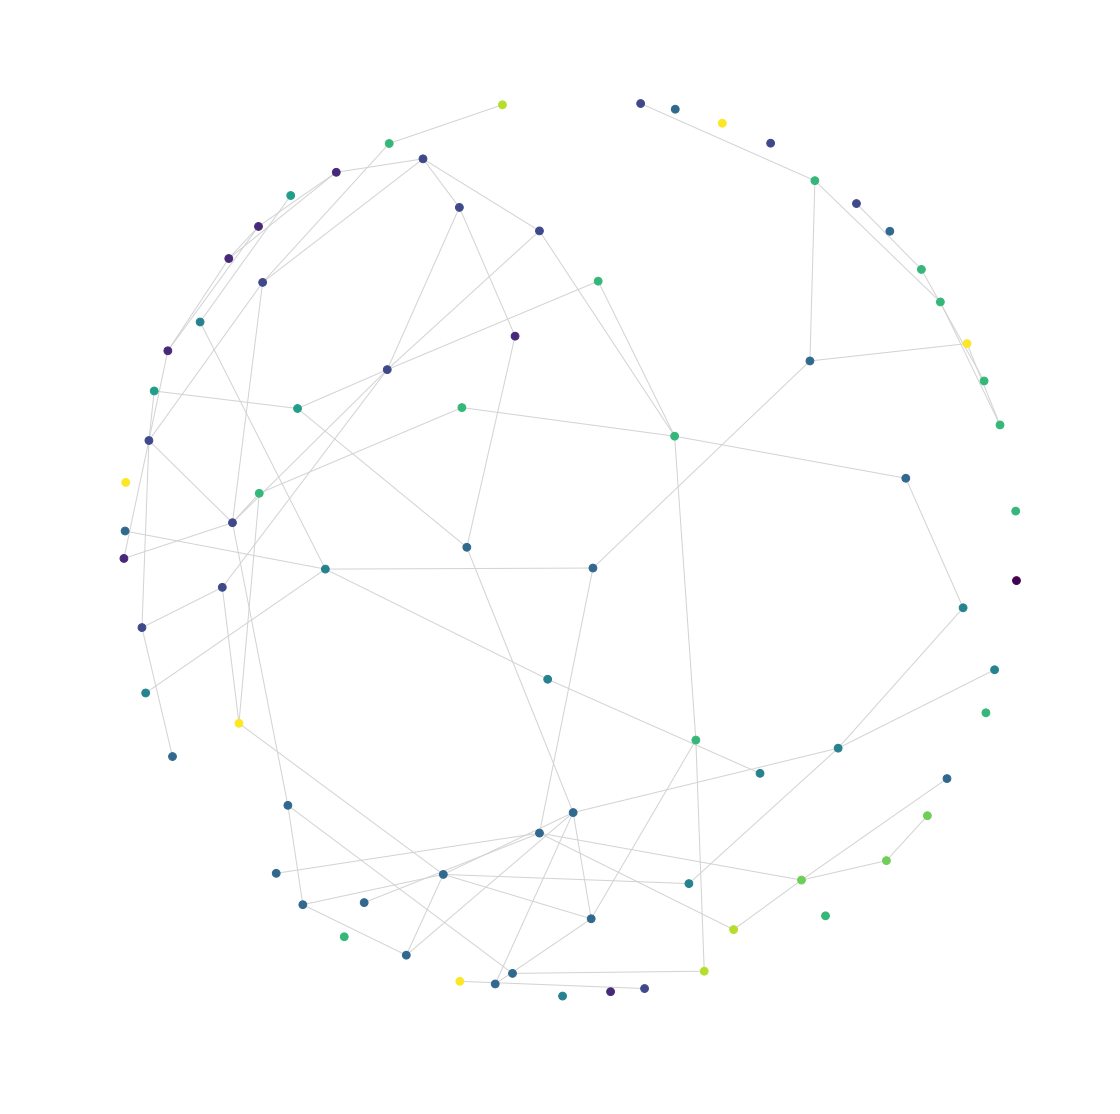

In [50]:
from itertools import count

groups = set(nx.get_node_attributes(G,'Tipo_lider').values())
mapping = dict(zip(sorted(groups),count()))
nodes = G.nodes()
colors = [mapping[G.node[n]['Tipo_lider']] for n in nodes]

fig=plt.figure(figsize=(15,15))
nx.draw(G, node_size=60, node_color= colors, edge_color='lightgray', with_labels=False)
plt.axis("tight")
plt.show()